In [193]:
import pandas as pd
import os , sys
notebook_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [194]:
import sys
import os
import sqlalchemy
# Add the 'scripts' directory to the Python path
sys.path.append(os.path.abspath('../scripts'))


In [195]:
from data_loader import connect_to_database, fetch_data_from_query, close_database_connection

# Query to fetch data
query = "SELECT * FROM xdr_data;"

# Using the module
conn = connect_to_database()

if conn:
    # Debugging connection success
    print("Connection successful. Proceeding to fetch data...")

    data = fetch_data_from_query(conn, query)

    if data is None:
        print("Fetching data failed. Please check your query or table existence.")
    else:
        print(data.head())  # Display the first few rows



Database connection established.
Connection successful. Proceeding to fetch data...


c:\Users\user\Desktop\KIFIYA Projects\TellCo-Week-02\scripts\data_loader.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data fetched successfully.
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          202473

In [72]:
#Cleaning_the_dataset

from data_clean import clean_data

clean_data = clean_data(data)
print(clean_data.head())

      Bearer Id               Start  Start ms                 End  End ms  \
0  1.311448e+19 2019-04-04 12:01:00     770.0 2019-04-25 14:35:00   662.0   
1  1.311448e+19 2019-04-09 13:04:00     235.0 2019-04-25 08:15:00   606.0   
2  1.311448e+19 2019-04-09 17:42:00       1.0 2019-04-25 11:58:00   652.0   
3  1.311448e+19 2019-04-10 00:31:00     486.0 2019-04-25 07:36:00   171.0   
4  1.311448e+19 2019-04-12 20:10:00     565.0 2019-04-25 10:40:00   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...       

EDA for TELECOMDB

In [73]:
clean_data.describe()
#print(stat)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.500010e+05,150001,150000.000000,150001,150000.000000,1.500010e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,1.007189e+19,2019-04-26 12:55:59.053435904,499.188200,2019-04-27 17:59:27.442446592,498.800880,1.046079e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112093e+07,4.546404e+08
min,0.000000e+00,2019-04-04 12:01:00,0.000000,2019-04-24 22:59:00,0.000000,0.000000e+00,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,0.000000e+00,0.000000e+00
25%,7.349883e+18,2019-04-25 00:26:00,250.000000,2019-04-26 07:30:00,251.000000,5.743600e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322196e+07,2.431057e+08
50%,7.349883e+18,2019-04-26 08:51:00,499.000000,2019-04-27 23:02:00,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114324e+07,4.558409e+08
75%,1.304243e+19,2019-04-27 18:19:00,749.000000,2019-04-29 07:15:00,750.000000,1.324300e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657051e+08
max,1.318654e+19,2024-12-20 12:47:34.369324,999.000000,2024-12-20 12:47:34.369324,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08
std,2.998300e+18,NaN,288.611834,NaN,288.097653,8.103780e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127685e+07,2.441449e+08


User Overview Analysis

Aggregation for User ... Task 1.1.

In [75]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

# Load environment variables from the .env file
load_dotenv()

# Retrieve the environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# Check if the environment variables are loaded
if not all([DB_HOST, DB_PORT, DB_NAME, DB_USER, DB_PASSWORD]):
    raise ValueError("One or more environment variables are not set in the .env file")

In [117]:
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

In [146]:
import pandas as pd
from sqlalchemy import create_engine

def execute_telecom_queries(db_url):
    """
    Executes telecom queries on the provided database URL.

    Args:
        db_url (str): Database connection URL.

    Returns:
        dict: Dictionary containing the unique IMSI count and user metrics.
    """
    engine = create_engine(db_url)

    # Count of Unique IMSIs
    unique_imsi_count = pd.read_sql_query("""
    SELECT COUNT(DISTINCT "IMSI") AS Unique_IMSI_Count FROM xdr_data;
    """, engine)

    # Aggregate per user (MSISDN/Number)
    user_metrics = pd.read_sql_query("""
    SELECT "MSISDN/Number" AS user,
           COUNT("Bearer Id") AS xDR_sessions,
           SUM("Dur. (ms)") AS total_session_duration,
           SUM("Total DL (Bytes)") AS total_download_data,
           SUM("Total UL (Bytes)") AS total_upload_data
    FROM xdr_data
    GROUP BY "MSISDN/Number";
    """, engine)

    return {
        "Unique IMSI Count": unique_imsi_count,
        "User Metrics": user_metrics
    }

# Example usage
results = execute_telecom_queries(connection_string)

# Print results
print("Results:")
for key, value in results.items():
    print(f"{key}:\n{value}\n")


Results:
Unique IMSI Count:
   unique_imsi_count
0             107265

User Metrics:
                user  xdr_sessions  total_session_duration  \
0       3.366211e+10             1                 14239.0   
1       3.361542e+10             2                 60414.0   
2                NaN           504              72446396.0   
3       3.376314e+10             4                306379.0   
4       3.365845e+10             3                159255.0   
...              ...           ...                     ...   
106852  3.368894e+10             1                 80723.0   
106853  3.365924e+10             1                104431.0   
106854  3.366539e+10             1                108761.0   
106855  3.376161e+10             1                 86399.0   
106856  3.366639e+10             1                 49167.0   

        total_download_data  total_upload_data  
0              7.026976e+08       4.288793e+07  
1              9.323741e+08       6.606921e+07  
2              4.869236

Task 1.2.

In [147]:
# Construct the connection string
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
engine = create_engine(connection_string)

In [148]:
from task1_2 import load_data,treat_missing_values_and_outliers
# Load and preprocess data
data = load_data(engine)
clean_data = treat_missing_values_and_outliers(data)

In [149]:
from task1_2 import describe_variables
# Describe variables
descriptions = describe_variables(clean_data)
print("Variable Descriptions:\n", descriptions)

Variable Descriptions:
                user     Bearer Id      Dur. (ms)  Total DL (Bytes)  \
count  1.500010e+05  1.500010e+05  150001.000000      1.500010e+05   
mean   3.375412e+10  1.013887e+19   98706.547697      4.546434e+08   
std    8.196776e+09  2.883600e+18   60045.579365      2.441421e+08   
min    3.360100e+10  6.917538e+18    7142.000000      7.114041e+06   
25%    3.365151e+10  7.349883e+18   57442.000000      2.431072e+08   
50%    3.366380e+10  7.349883e+18   86399.000000      4.558409e+08   
75%    3.368473e+10  1.304243e+19  127906.000000      6.657051e+08   
max    3.197021e+12  1.318654e+19  347699.000000      9.029696e+08   

       Total UL (Bytes)  
count      1.500010e+05  
mean       4.112097e+07  
std        1.125635e+07  
min        7.324119e+06  
25%        3.322849e+07  
50%        4.113671e+07  
75%        4.902660e+07  
max        7.483343e+07  


In [157]:
from variable_transformations import variable_transformations

#Variable transformation
transformed_data, decile_data= variable_transformations(clean_data)

print("Decile Data:\n", decile_data)

Decile Data:
    Decile  Total Data Volume (Bytes)
0       0               7.439227e+12
1       1               7.444813e+12
2       2               7.478182e+12
3       3               1.614186e+13
4       4               6.089119e+12
5       5               7.443044e+12
6       6               7.402705e+12
7       7               7.455455e+12
8       8               7.470750e+12


In [158]:
#Analyze basic metrics

from task1_2 import analyze_basic_metrics
basic_metrics = analyze_basic_metrics(transformed_data)
print("Basic Metrics:\n", basic_metrics)

Basic Metrics:
                user     Bearer Id      Dur. (ms)  Total DL (Bytes)  \
count  1.500010e+05  1.500010e+05  150001.000000      1.500010e+05   
mean   3.375412e+10  1.013887e+19   98706.547697      4.546434e+08   
std    8.196776e+09  2.883600e+18   60045.579365      2.441421e+08   
min    3.360100e+10  6.917538e+18    7142.000000      7.114041e+06   
25%    3.365151e+10  7.349883e+18   57442.000000      2.431072e+08   
50%    3.366380e+10  7.349883e+18   86399.000000      4.558409e+08   
75%    3.368473e+10  1.304243e+19  127906.000000      6.657051e+08   
max    3.197021e+12  1.318654e+19  347699.000000      9.029696e+08   

       Total UL (Bytes)  Total Data Volume (Bytes)         Decile  
count      1.500010e+05               1.500010e+05  150001.000000  
mean       4.112097e+07               4.957644e+08       3.881921  
std        1.125635e+07               2.443802e+08       2.470685  
min        7.324119e+06               2.895611e+07       0.000000  
25%        3.

In [163]:
# Non-graphical Univariate Analysis

from non_graphical_univariate_analysis import non_graphical_univariate_analysis
dispersion_params = non_graphical_univariate_analysis(transformed_data)
print("Dispersion Parameters:\n", dispersion_params)

Dispersion Parameters:
              user     Bearer Id     Dur. (ms)  Total DL (Bytes)  \
std  8.196776e+09  2.883600e+18  6.004558e+04      2.441421e+08   
min  3.360100e+10  6.917538e+18  7.142000e+03      7.114041e+06   
max  3.197021e+12  1.318654e+19  3.476990e+05      9.029696e+08   
25%  3.365151e+10  7.349883e+18  5.744200e+04      2.431072e+08   
50%  3.366380e+10  7.349883e+18  8.639900e+04      4.558409e+08   
75%  3.368473e+10  1.304243e+19  1.279060e+05      6.657051e+08   
var  6.718714e+19  8.315146e+36  3.605472e+09      5.960535e+16   

     Total UL (Bytes)  Total Data Volume (Bytes)    Decile  
std      1.125635e+07               2.443802e+08  2.470685  
min      7.324119e+06               2.895611e+07  0.000000  
max      7.483343e+07               9.526413e+08  8.000000  
25%      3.322849e+07               2.844790e+08  2.000000  
50%      4.113671e+07               4.968612e+08  3.000000  
75%      4.902660e+07               7.065073e+08  6.000000  
var      1.2

In [164]:
# Graphical Univariate Analysis
non_graphical_univariate_analysis(transformed_data)

,user,Bearer Id,Dur. (ms),Total DL (Bytes),Total UL (Bytes),Total Data Volume (Bytes),Decile
std,8.196776e+09,2.883600e+18,6.004558e+04,2.441421e+08,1.125635e+07,2.443802e+08,2.470685
min,3.360100e+10,6.917538e+18,7.142000e+03,7.114041e+06,7.324119e+06,2.895611e+07,0.000000
max,3.197021e+12,1.318654e+19,3.476990e+05,9.029696e+08,7.483343e+07,9.526413e+08,8.000000
25%,3.365151e+10,7.349883e+18,5.744200e+04,2.431072e+08,3.322849e+07,2.844790e+08,2.000000
50%,3.366380e+10,7.349883e+18,8.639900e+04,4.558409e+08,4.113671e+07,4.968612e+08,3.000000
75%,3.368473e+10,1.304243e+19,1.279060e+05,6.657051e+08,4.902660e+07,7.065073e+08,6.000000
var,6.718714e+19,8.315146e+36,3.605472e+09,5.960535e+16,1.267054e+14,5.972170e+16,6.104284


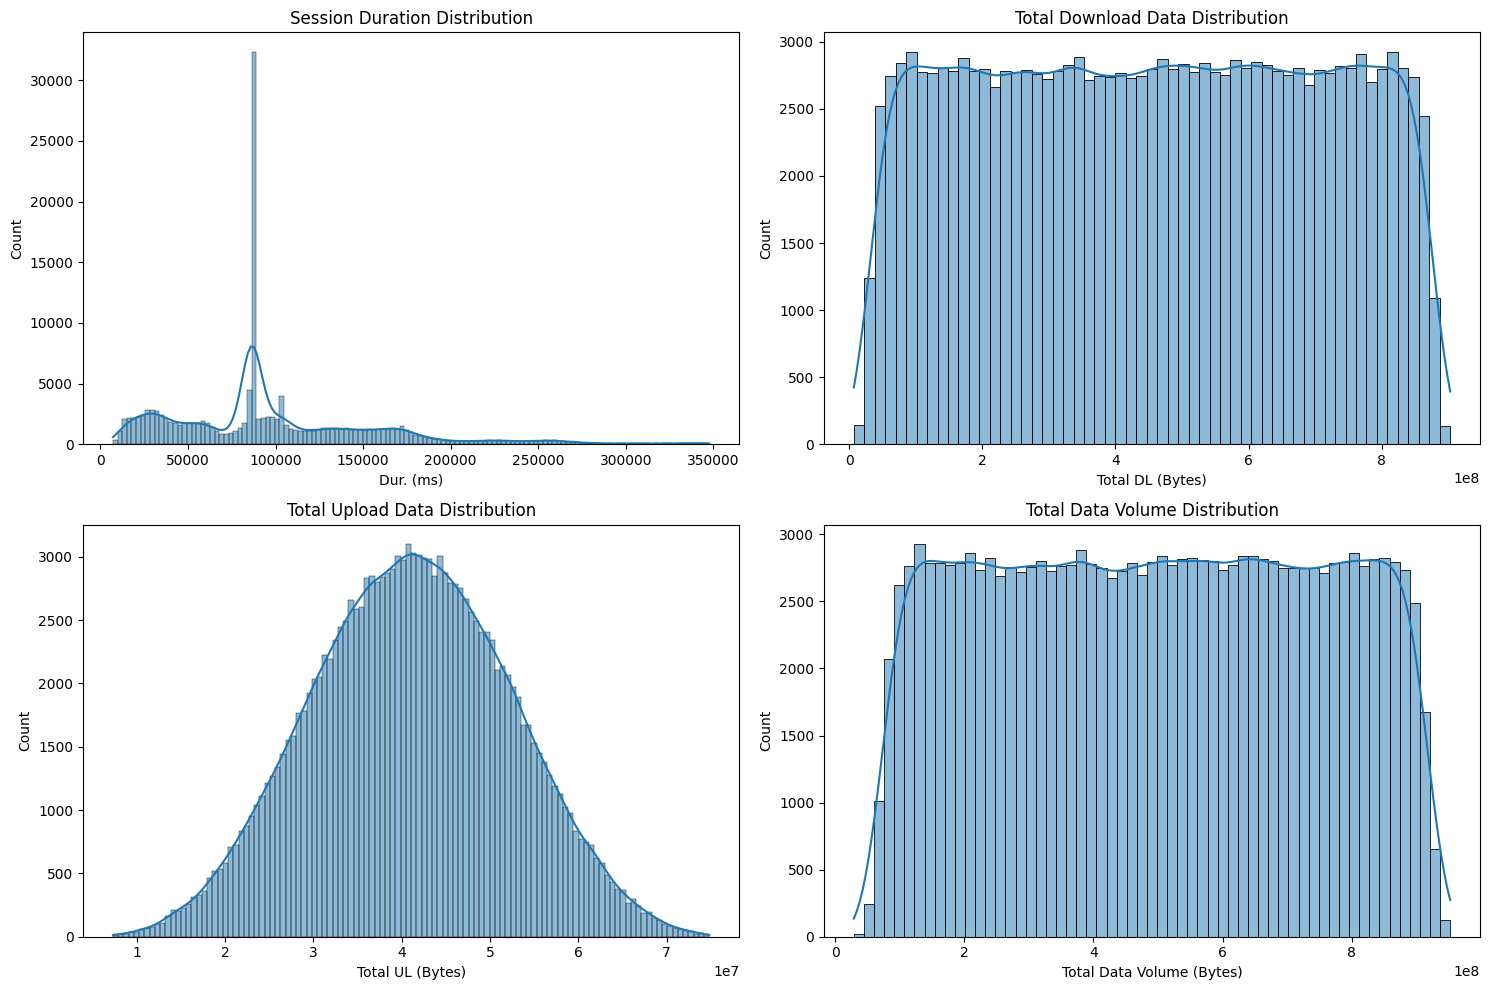

In [168]:
# Bivaiate Analysis
from graphical_univariate_analysis import graphical_univariate_analysis
graphical_univariate_analysis(transformed_data)

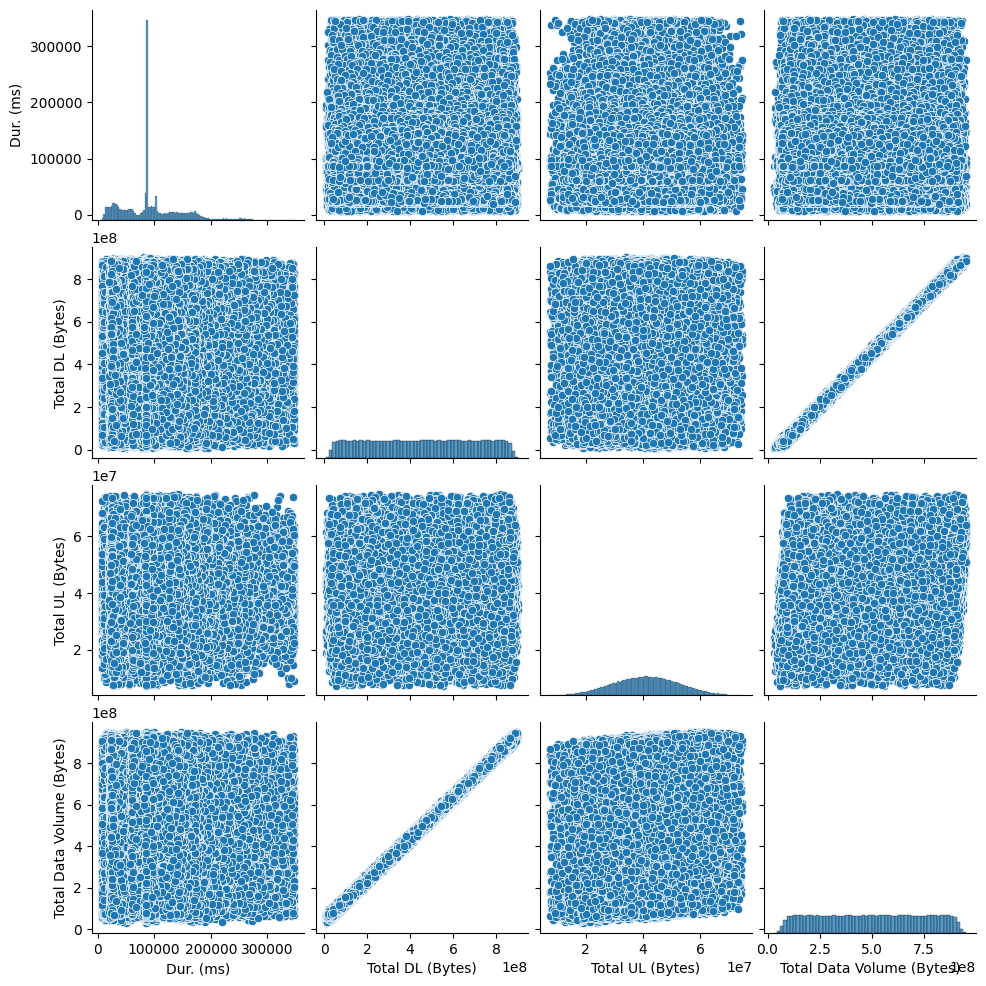

In [170]:
# Bivariate Analysis
from bivariate_analysis import bivariate_analysis

bivariate_analysis(transformed_data)

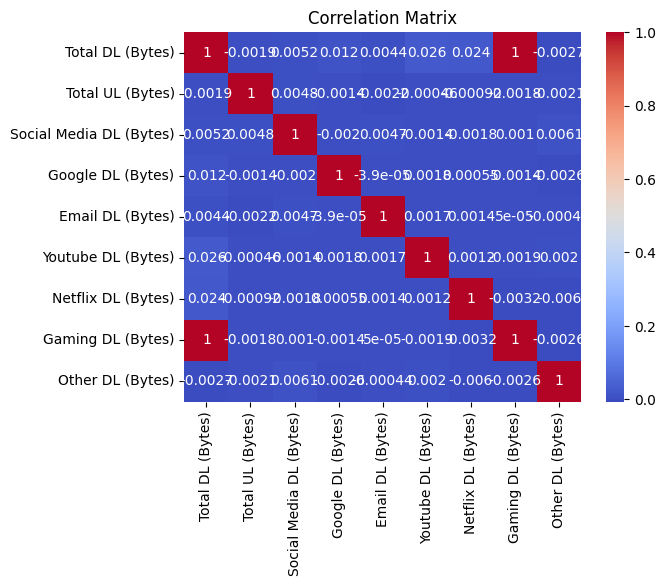

Correlation Matrix:
                          Total DL (Bytes)  Total UL (Bytes)  \
Total DL (Bytes)                 1.000000         -0.001883   
Total UL (Bytes)                -0.001883          1.000000   
Social Media DL (Bytes)          0.005164          0.004760   
Google DL (Bytes)                0.012189         -0.001384   
Email DL (Bytes)                 0.004395         -0.002234   
Youtube DL (Bytes)               0.025685         -0.000457   
Netflix DL (Bytes)               0.024386         -0.000923   
Gaming DL (Bytes)                0.999131         -0.001839   
Other DL (Bytes)                -0.002709         -0.002053   

                         Social Media DL (Bytes)  Google DL (Bytes)  \
Total DL (Bytes)                        0.005164           0.012189   
Total UL (Bytes)                        0.004760          -0.001384   
Social Media DL (Bytes)                 1.000000          -0.001954   
Google DL (Bytes)                      -0.001954           1.000

In [203]:
import pandas as pd
import numpy as np  # Add this line
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv

# Load environment variables from the .env file
load_dotenv()

# Retrieve the environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# Construct the connection string
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Create the engine
engine = create_engine(connection_string)

# Update the query with exact column names and without table prefix
query = """
SELECT "MSISDN/Number" AS user,
       "Bearer Id",
       "Dur. (ms)",
       "Total DL (Bytes)",
       "Total UL (Bytes)",
       "Social Media DL (Bytes)",
       "Google DL (Bytes)",
       "Email DL (Bytes)",
       "Youtube DL (Bytes)",
       "Netflix DL (Bytes)",
       "Gaming DL (Bytes)",
       "Other DL (Bytes)"
FROM xdr_data;
"""

# Load the cleaned data from the database
data = pd.read_sql_query(query, engine)

# Treat missing values and outliers by replacing them with the mean
data.fillna(data.mean(), inplace=True)
for col in data.columns:
    if data[col].dtype != 'object':
        mean = data[col].mean()
        std = data[col].std()
        upper_bound = mean + 3 * std
        lower_bound = mean - 3 * std
        data[col] = np.where(data[col] > upper_bound, mean, data[col])
        data[col] = np.where(data[col] < lower_bound, mean, data[col])

# Compute a correlation matrix for the specified variables
correlation_matrix = data[['Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)',
                           'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)


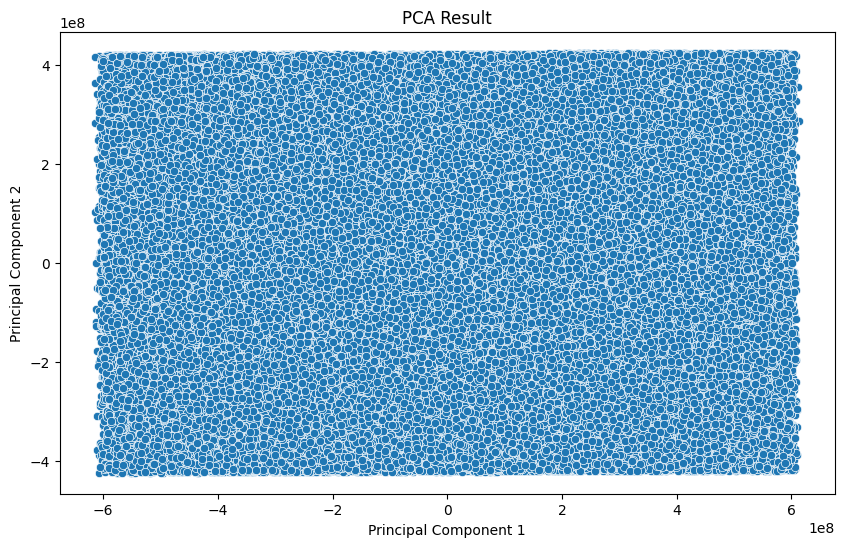

PCA Results:
    Principal Component 1  Principal Component 2          user
0          -2.039403e+08          -2.501135e+08  3.366496e+10
1           2.721630e+08           1.068124e+08  3.368185e+10
2          -2.596686e+08          -1.137249e+07  3.376063e+10
3           5.424642e+08           3.299546e+08  3.375034e+10
4           1.551971e+08           1.301850e+08  3.369980e+10


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
from sklearn.decomposition import PCA

# Load environment variables from the .env file
load_dotenv()

# Retrieve the environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

# Construct the connection string
connection_string = f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

# Create the engine
engine = create_engine(connection_string)

# Update the query with exact column names and without table prefix
query = """
SELECT "MSISDN/Number" AS user,
       "Bearer Id",
       "Dur. (ms)",
       "Total DL (Bytes)",
       "Total UL (Bytes)",
       "Social Media DL (Bytes)",
       "Google DL (Bytes)",
       "Email DL (Bytes)",
       "Youtube DL (Bytes)",
       "Netflix DL (Bytes)",
       "Gaming DL (Bytes)",
       "Other DL (Bytes)"
FROM xdr_data;
"""

# Load the cleaned data from the database
data = pd.read_sql_query(query, engine)

# Treat missing values and outliers by replacing them with the mean
data.fillna(data.mean(), inplace=True)
for col in data.columns:
    if data[col].dtype != 'object':
        mean = data[col].mean()
        std = data[col].std()
        upper_bound = mean + 3 * std
        lower_bound = mean - 3 * std
        data[col] = np.where(data[col] > upper_bound, mean, data[col])
        data[col] = np.where(data[col] < lower_bound, mean, data[col])

# Dimensionality Reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data[['Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Google DL (Bytes)',
                                   'Email DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']])
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['user'] = data['user']

# Visualize the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA Result')
plt.show()

print("PCA Results:\n", pca_df.head())
